# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [1129]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [1130]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
67,1,Wisconsin,Illinois,264
68,1,Illinois,Indiana,208
69,1,Michigan,Illinois,391
70,1,Ohio,Michigan,254


DiGraph with 29 nodes and 72 edges


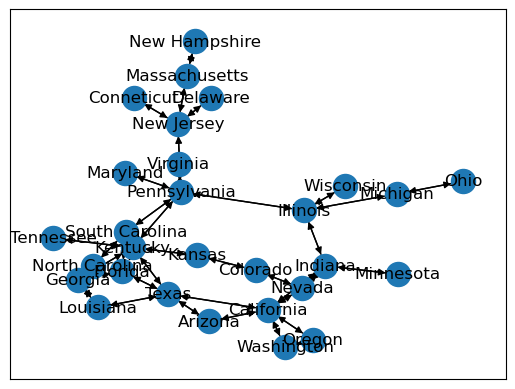

In [1131]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance')
Mississippi_Graph = Mississippi_Graph.to_directed(as_view=False)
nx.draw_networkx(Mississippi_Graph,with_labels=True)
print(Mississippi_Graph)

In [1132]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [1133]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [1134]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = Mississippi_Graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = (pd.DataFrame.from_dict(l, orient='index').rename_axis('State').reset_index())
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m

In [1135]:
def closeness_centrality(graph,weight):
    c = list(graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False, inplace=True)
    return df

In [1136]:
def shortest_path(graph,location,weight):
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df3

In [1137]:
def shortest_path_product1(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4

In [1138]:
def shortest_path_product2(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand]}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4['Total_distance'].sum()/df4['Warehouse_size'].sum()


In [1139]:
def cost_function(graph,location,weight,demand):
    df4 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility','Warehouse_size','Total_distance','Days_To_Travel','Routes_Per_Truck'])
    b = nx.shortest_path_length(graph,location,weight=weight)
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i], 'Warehouse_size': Mississippi_Graph.nodes[i][demand], 'Total_distance': b[i]*Mississippi_Graph.nodes[i][demand], 'Days_To_Travel': b[i] / 650, 'Routes_Per_Truck': 1/(b[i] / 650)}
        df4 = df4.append(new_row, ignore_index=True)
    df4.sort_values(by=['Shortest_path_to_production_facility'], ascending=False, inplace=True)
    return df4

In [1140]:
def average_shortest_path(graph,location,weight):
    b = nx.shortest_path_length(graph,location,weight=weight)
    average_shortest_path = sum(b.values()) / (len(b) - 1)
    return average_shortest_path

In [1141]:
def betweenness_centrality(graph, weight):
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(graph,weight=weight)
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    df1.sort_values(by=['Betweenness_centrality'], ascending=False, inplace=True)
    return df1

In [1142]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)

    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    print('Entropic degree:')
    display(i)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)

    
    import warnings
    warnings.filterwarnings("ignore")

In [1143]:
metrics_graph(graph=Mississippi_Graph,weight='Distance',demand='warehouse size',location='Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
14,Pennsylvania,0.000814
9,Kentucky,0.000774
18,New Jersey,0.000760
16,Maryland,0.000748
20,Delaware,0.000703
17,Virginia,0.000694
19,Conneticut,0.000672
10,Tennessee,0.000669
12,South Carolina,0.000669
25,Illinois,0.000665


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Minnesota,3034
27,Ohio,2889
26,Washington,2885
25,Oregon,2728
24,Michigan,2635
23,Wisconsin,2508
22,Indiana,2452
21,Nevada,2322
20,Illinois,2244
19,California,2192


Average shortest path to production center:


1826.9642857142858

Betweenness centrality for all nodes:


,State,Betweenness_centrality
14,Pennsylvania,0.576720
9,Kentucky,0.404762
25,Illinois,0.298942
18,New Jersey,0.267196
2,California,0.174603
13,Kansas,0.174603
3,Nevada,0.171958
23,Colorado,0.129630
6,Indiana,0.124339
12,South Carolina,0.108466


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,California,6477.543915
5,Texas,5023.069451
6,Indiana,4140.262353
9,Kentucky,2601.372566
14,Pennsylvania,2300.594197
3,Nevada,2214.239695
25,Illinois,1397.098262
7,Louisiana,1244.380678
4,Arizona,1216.949336
8,Florida,1158.102446


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Minnesota,3034,820000,2487880000
27,Ohio,2889,1855000,5359095000
26,Washington,2885,2280000,6577800000
25,Oregon,2728,855000,2332440000
24,Michigan,2635,1000000,2635000000
23,Wisconsin,2508,1100000,2758800000
22,Indiana,2452,5450000,13363400000
21,Nevada,2322,2150000,4992300000
20,Illinois,2244,6012000,13490928000
19,California,2192,14123800,30959369600


Total distance per product=


1123.589987463836

Entropic degree:


,Entropic_Degree
California,10101.622042
Texas,8537.698356
Indiana,7466.658887
Kentucky,4717.331700
Nevada,4245.905455
Pennsylvania,3942.749267
Illinois,2494.283836
Arizona,2287.047361
Florida,2109.860532
Colorado,1961.406416


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Pennsylvania,0.000814,0.576720,2300.594197,1.079669
1,Kentucky,0.000774,0.404762,2601.372566,0.814831
25,California,0.000427,0.174603,6477.543915,0.482736
13,Indiana,0.000619,0.124339,4140.262353,0.318667
9,Illinois,0.000665,0.298942,1397.098262,0.277687
20,Texas,0.000538,0.082011,5023.069451,0.221480
24,Nevada,0.000436,0.171958,2214.239695,0.166137
2,New Jersey,0.000760,0.267196,573.837256,0.116592
15,Kansas,0.000603,0.174603,786.630322,0.082779
21,Colorado,0.000503,0.129630,1000.317272,0.065257


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE LOUISIANA

In [1216]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
directed1 = pd.read_excel('distance_state_louisiana_4.xlsx')
# Show contents of the dataframe
directed1

,weight,0,b,Distance
0,1,California,Oregon,536
1,1,California,Arizona,755
2,1,Kentucky,Tennessee,210
3,1,Georgia,Kentucky,407
4,1,Florida,South Carolina,355
5,1,Kentucky,Kansas,621
6,1,Pennsylvania,Maryland,112
7,1,Pennsylvania,Virginia,220
8,1,Pennsylvania,New Jersey,127
9,1,New Jersey,Conneticut,180


DiGraph with 29 nodes and 28 edges


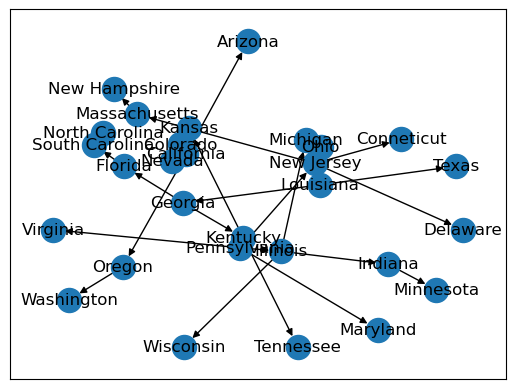

In [1217]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
Directed_Graph1= nx.from_pandas_edgelist(directed1, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Graph1,with_labels=True)
print(Directed_Graph1)

In [1218]:
metrics_graph(graph=Directed_Graph1,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
15,New Hampshire,0.000241
27,Delaware,0.000218
13,Conneticut,0.000201
26,North Carolina,0.000189
14,Massachusetts,0.000181
10,Maryland,0.000164
4,Tennessee,0.000163
12,New Jersey,0.000162
7,South Carolina,0.000152
11,Virginia,0.000146


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3969
27,Washington,3910
26,Oregon,3750
25,California,3214
24,Nevada,3084
23,Minnesota,3034
22,Ohio,2889
21,Michigan,2635
20,Wisconsin,2508
19,Indiana,2452


Average shortest path to production center:


2054.0714285714284

Betweenness centrality for all nodes:


,State,Betweenness_centrality
3,Kentucky,0.058201
9,Pennsylvania,0.051587
5,Georgia,0.034392
28,Colorado,0.026455
23,Nevada,0.026455
18,Illinois,0.026455
8,Kansas,0.023810
0,California,0.023810
12,New Jersey,0.021164
1,Oregon,0.009259


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
24,Louisiana,1244.380678
3,Kentucky,1105.655133
9,Pennsylvania,1030.531892
0,California,889.426014
18,Illinois,706.745746
16,Indiana,582.000000
28,Colorado,504.900000
5,Georgia,442.991411
12,New Jersey,432.323032
8,Kansas,281.448000


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3969,14123800,56057362200
27,Washington,3910,2280000,8914800000
26,Oregon,3750,855000,3206250000
25,California,3214,3210500,10318547000
24,Nevada,3084,2150000,6630600000
23,Minnesota,3034,820000,2487880000
22,Ohio,2889,1855000,5359095000
21,Michigan,2635,1000000,2635000000
20,Wisconsin,2508,1100000,2758800000
19,Indiana,2452,50000000,122600000000


Total distance per product=


1599.0077334620103

Entropic degree:


,Entropic_Degree
Kentucky,2004.996160
Pennsylvania,1766.121494
California,1671.523503
Illinois,1261.775594
Louisiana,1244.380678
Colorado,990.000000
Georgia,862.102580
New Jersey,827.254176
Indiana,582.000000
Kansas,540.000000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
20,Kentucky,0.000107,0.058201,1105.655133,0.006860
22,Pennsylvania,0.000106,0.051587,1030.531892,0.005647
17,California,0.000116,0.023810,889.426014,0.002454
24,Illinois,0.000095,0.026455,706.745746,0.001774
7,New Jersey,0.000162,0.021164,432.323032,0.001479
21,Colorado,0.000107,0.026455,504.900000,0.001423
27,Georgia,0.000068,0.034392,442.991411,0.001034
23,Kansas,0.000100,0.023810,281.448000,0.000672
13,Indiana,0.000126,0.006614,582.000000,0.000487
25,Nevada,0.000087,0.026455,67.795000,0.000155


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH PRODUCTION NODE PENNSYLVANIA

In [1147]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
directed = pd.read_excel('distance_state_pennsylvania.xlsx')
# Show contents of the dataframe
directed

,weight,0,b,Distance
0,1,California,Oregon,536
1,1,California,Arizona,755
2,1,Kentucky,Tennessee,210
3,1,Kentucky,Georgia,407
4,1,Florida,South Carolina,355
5,1,Kentucky,Kansas,621
6,1,Pennsylvania,Maryland,112
7,1,Pennsylvania,Virginia,220
8,1,Pennsylvania,New Jersey,127
9,1,New Jersey,Conneticut,180


DiGraph with 29 nodes and 28 edges


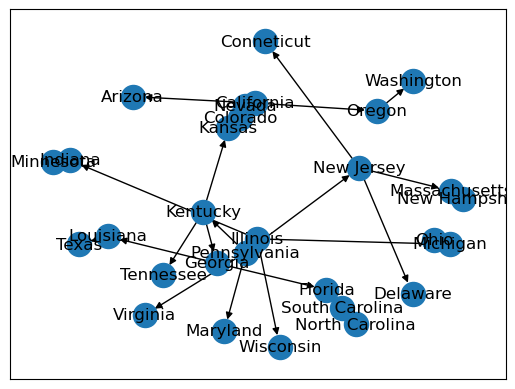

In [1148]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 50000000 
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 8350000
Directed_Graph= nx.from_pandas_edgelist(directed, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Graph,with_labels=True)
print(Directed_Graph)

In [1149]:
metrics_graph(graph=Directed_Graph,weight='Distance',demand='warehouse size',location='Pennsylvania')

Closeness centrality for all nodes:


,State,Closeness_centrality
27,Delaware,0.000407
15,New Hampshire,0.000362
10,Maryland,0.000319
13,Conneticut,0.000293
12,New Jersey,0.000281
14,Massachusetts,0.000209
26,North Carolina,0.000189
11,Virginia,0.000162
7,South Carolina,0.000160
6,Florida,0.000149


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Arizona,3598
27,Washington,3539
26,Oregon,3379
25,California,2843
24,Nevada,2713
23,Texas,1927
22,North Carolina,1812
21,Colorado,1723
20,South Carolina,1585
19,Minnesota,1539


Average shortest path to production center:


1357.392857142857

Betweenness centrality for all nodes:


,State,Betweenness_centrality
23,Nevada,0.021164
0,California,0.019841
28,Colorado,0.019841
3,Kentucky,0.018519
8,Kansas,0.015873
5,Georgia,0.013228
1,Oregon,0.007937
6,Florida,0.007937
18,Illinois,0.006614
7,South Carolina,0.005291


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
9,Pennsylvania,2808.545510
0,California,1071.844388
3,Kentucky,982.963649
18,Illinois,706.745746
5,Georgia,515.982704
28,Colorado,504.900000
12,New Jersey,432.323032
16,Indiana,322.719000
8,Kansas,281.448000
24,Louisiana,252.072000


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Arizona,3598,3210500,11551379000
27,Washington,3539,2280000,8068920000
26,Oregon,3379,855000,2889045000
25,California,2843,14123800,40153963400
24,Nevada,2713,2150000,5832950000
23,Texas,1927,8834000,17023118000
22,North Carolina,1812,397800,720813600
21,Colorado,1723,1000000,1723000000
20,South Carolina,1585,2340000,3708900000
19,Minnesota,1539,820000,1261980000


Total distance per product=


943.9459365434177

Entropic degree:


,Entropic_Degree
Pennsylvania,2808.545510
Kentucky,1782.507298
California,1671.523503
Illinois,1261.775594
Georgia,1004.150441
Colorado,990.000000
New Jersey,827.254176
Indiana,582.000000
Kansas,540.000000
Louisiana,432.000000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
17,California,0.000111,0.019841,1071.844388,0.002363
26,Kentucky,0.000064,0.018519,982.963649,0.001157
22,Colorado,0.000094,0.019841,504.900000,0.000940
20,Georgia,0.000104,0.013228,515.982704,0.000709
4,New Jersey,0.000281,0.005291,432.323032,0.000643
24,Kansas,0.000079,0.015873,281.448000,0.000354
9,Florida,0.000149,0.007937,194.859500,0.000230
27,Illinois,0.000048,0.006614,706.745746,0.000223
25,Nevada,0.000077,0.021164,67.795000,0.000111
19,Louisiana,0.000109,0.003968,252.072000,0.000109


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE LOUISIANA

In [1150]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
huge_network = pd.read_excel('all_distances2.xlsx')
# Show contents of the dataframe
huge_network

,0,b1,Distance,b2
0,Washington,New York,2907.6,New York
1,Washington,Maryland,2811.0,Maryland
2,Washington,Georgia,2688.8,Georgia
3,Washington,Maine,3234.6,Maine
4,Washington,Texas,2249.1,Texas
...,...,...,...,...
1445,Wisconsin,New Mexico,1352.2,New Mexico
1446,Wisconsin,Illinois,273.1,Illinois
1447,Wisconsin,Florida,1124.9,Florida
1448,Wisconsin,Kansas,543.4,Kansas


In [1151]:
huge_network['b1'] = huge_network['b2']
huge_network.rename(columns={"b1":"b"},inplace=True)
huge_network.drop(huge_network.columns[[3]], axis=1, inplace=True)
huge_network

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [1152]:
huge_network2 = huge_network.copy()

In [1153]:
huge_network2

,0,b,Distance
0,Washington,New York,2907.6
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
3,Washington,Maine,3234.6
4,Washington,Texas,2249.1
...,...,...,...
1445,Wisconsin,New Mexico,1352.2
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


In [1154]:
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == 'Connecticut':
        huge_network.iloc[i,1] = 'Conneticut'

In [1155]:
for i in range(len(huge_network)):        
    if huge_network.iloc[i,0] == 'Connecticut':
        huge_network.iloc[i,0] = 'Conneticut'

In [1156]:
huge_network2 = huge_network.copy()

In [1157]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] not in c:
        l2.append(i)
for i in range(len(huge_network)):
    if huge_network.iloc[i,1] == huge_network.iloc[i,0]:
        l2.append(i)

In [1158]:
joinedlist = l2

In [1159]:
huge_network2.drop(huge_network2.index[joinedlist], inplace=True)

In [1160]:
huge_network2

,0,b,Distance
1,Washington,Maryland,2811.0
2,Washington,Georgia,2688.8
4,Washington,Texas,2249.1
5,Washington,Louisiana,2579.6
8,Washington,Massachusetts,3074.6
...,...,...,...
1443,Wisconsin,Oregon,2022.7
1446,Wisconsin,Illinois,273.1
1447,Wisconsin,Florida,1124.9
1448,Wisconsin,Kansas,543.4


Graph with 29 nodes and 406 edges


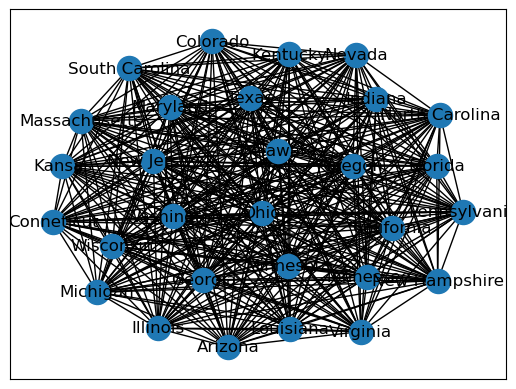

In [1161]:
Huge_Graph = nx.from_pandas_edgelist(huge_network2, 0, 'b', edge_attr='Distance')
nx.draw_networkx(Huge_Graph,with_labels=True)
print(Huge_Graph)

DiGraph with 29 nodes and 56 edges


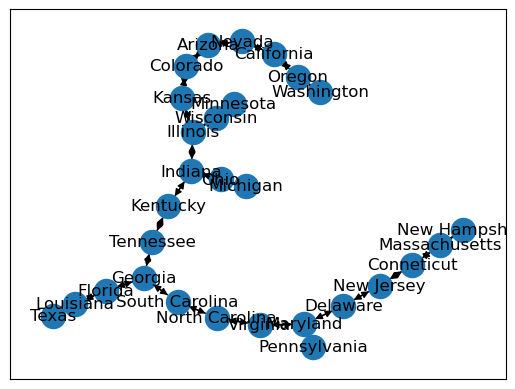

In [1162]:
a = nx.minimum_spanning_tree(Huge_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)
a = a.to_directed(as_view=False)
nx.draw_networkx(a,with_labels=True)
print(a)

In [1163]:
metrics_graph(graph=a,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4859.1
27,Oregon,4700.7
26,California,4164.6
25,Nevada,4033.9
24,Arizona,3294.4
23,Colorado,2475.8
22,Minnesota,2082.0
21,New Hampshire,2020.9
20,Massachusetts,1952.3
19,Kansas,1930.6


Average shortest path to production center:


1959.3571428571431

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
4,Louisiana,1133.634989
19,Arizona,1078.184392
10,Colorado,898.804728
25,Illinois,706.553115
27,Kansas,618.951777
2,Georgia,560.289340
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
15,Indiana,460.449414


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4859.1,2280000,11078748000.0
27,Oregon,4700.7,855000,4019098500.0
26,California,4164.6,14123800,58819977480.000008
25,Nevada,4033.9,2150000,8672885000.0
24,Arizona,3294.4,3210500,10576671200.0
23,Colorado,2475.8,1000000,2475800000.0
22,Minnesota,2082.0,820000,1707240000.0
21,New Hampshire,2020.9,63800,128933420.0
20,Massachusetts,1952.3,1000000,1952300000.0
19,Kansas,1930.6,2120000,4092872000.0


Total distance per product=


1314.7899973274843

Entropic degree:


,Entropic_Degree
Arizona,2026.262470
Colorado,1762.362211
Illinois,1261.431684
Kansas,1187.551376
Louisiana,1133.634989
Georgia,1090.375284
Nevada,1030.079520
Florida,930.534713
Oregon,856.451480
Indiana,830.386680


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
2,Georgia,0.000749,0.595238,560.289340,0.249877
5,Illinois,0.000704,0.489418,706.553115,0.243515
3,Indiana,0.000740,0.560847,460.449414,0.191131
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
1,Kentucky,0.000750,0.515873,268.320324,0.103815
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


In [1164]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
minimal_huge_graph = pd.read_excel('distance_state_minimal_network_louisiana_2.xlsx')
# Show contents of the dataframe
minimal_huge_graph

,weight,0,b,Distance
0,1,Oregon,Washington,160
1,1,California,Oregon,536
2,1,Nevada,California,130
3,1,Arizona,Nevada,740
4,1,Colorado,Arizona,819
5,1,Kansas,Colorado,540
6,1,Illinois,Kansas,373
7,1,Illinois,Wisconsin,264
8,1,Wisconsin,Minnesota,251
9,1,Indiana,Illinois,208


DiGraph with 29 nodes and 28 edges


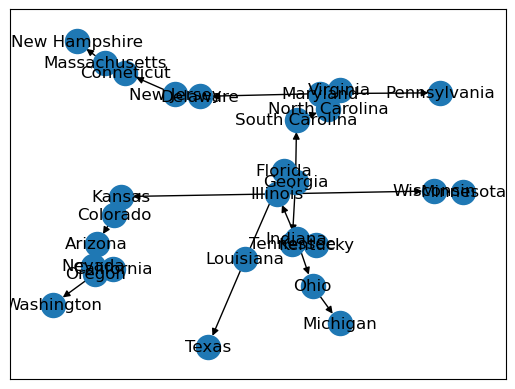

In [1165]:
Directed_Minimal_Huge_Graph= nx.from_pandas_edgelist(minimal_huge_graph, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Minimal_Huge_Graph,with_labels=True)
print(Directed_Minimal_Huge_Graph)

In [1166]:
metrics_graph(graph=Directed_Minimal_Huge_Graph,weight='Distance',demand='warehouse size',location='Louisiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
28,New Hampshire,0.000479
27,Massachusetts,0.000431
25,New Jersey,0.000405
26,Conneticut,0.000399
24,Delaware,0.000369
23,Pennsylvania,0.000347
22,Maryland,0.000301
11,Ohio,0.000287
12,Michigan,0.000280
7,Illinois,0.000278


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4835
27,Oregon,4675
26,California,4139
25,Nevada,4009
24,Arizona,3269
23,Colorado,2450
22,Minnesota,2052
21,New Hampshire,1999
20,Massachusetts,1931
19,Kansas,1910


Average shortest path to production center:


1942.0

Betweenness centrality for all nodes:


,State,Betweenness_centrality
10,Indiana,0.079365
7,Illinois,0.071429
13,Kentucky,0.068783
15,Georgia,0.066138
14,Tennessee,0.055556
6,Kansas,0.055556
5,Colorado,0.052910
4,Arizona,0.047619
22,Maryland,0.047619
21,Virginia,0.046296


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
17,Louisiana,1140.961460
7,Illinois,461.923115
5,Colorado,417.690000
4,Arizona,393.757700
2,California,343.703568
15,Georgia,309.299593
10,Indiana,281.883063
6,Kansas,281.448000
16,Florida,143.262900
11,Ohio,131.711700


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4835,2280000,11023800000
27,Oregon,4675,855000,3997125000
26,California,4139,14123800,58458408200
25,Nevada,4009,2150000,8619350000
24,Arizona,3269,3210500,10495124500
23,Colorado,2450,1000000,2450000000
22,Minnesota,2052,820000,1682640000
21,New Hampshire,1999,63800,127536200
20,Massachusetts,1931,1000000,1931000000
19,Kansas,1910,2120000,4049200000


Total distance per product=


1304.0912194201908

Entropic degree:


,Entropic_Degree
Louisiana,1140.961460
Illinois,824.685987
Colorado,819.000000
Arizona,740.000000
Georgia,601.925841
Kansas,540.000000
California,536.000000
Indiana,508.355389
Florida,261.000000
Ohio,254.000000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
9,Illinois,0.000278,0.071429,461.923115,0.009170
12,Indiana,0.000264,0.079365,281.883063,0.005913
18,Colorado,0.000198,0.052910,417.690000,0.004371
14,Kansas,0.000242,0.055556,281.448000,0.003781
24,Georgia,0.000148,0.066138,309.299593,0.003022
22,Arizona,0.000153,0.047619,393.757700,0.002866
6,Maryland,0.000301,0.047619,121.245012,0.001740
21,California,0.000156,0.029101,343.703568,0.001557
16,Kentucky,0.000224,0.068783,91.540700,0.001412
2,New Jersey,0.000405,0.031746,94.068000,0.001211


# PART 2 MINIMAL DISTRIBUTION NETWORK WITH ADDED NODES AND PRODUCTION NODE GEORGIA

In [1167]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 50000000

In [1168]:
metrics_graph(graph=a,weight='Distance',demand='warehouse size',location='Georgia')

Closeness centrality for all nodes:


,State,Closeness_centrality
18,Tennessee,0.000754
12,Kentucky,0.000750
2,Georgia,0.000749
15,Indiana,0.000740
7,South Carolina,0.000712
25,Illinois,0.000704
20,North Carolina,0.000670
8,Ohio,0.000660
26,Florida,0.000640
21,Virginia,0.000635


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4137.3
27,Oregon,3978.9
26,California,3442.8
25,Nevada,3312.1
24,Arizona,2572.6
23,Colorado,1754.0
22,Minnesota,1360.2
21,New Hampshire,1299.1
20,Massachusetts,1230.5
19,Kansas,1208.8


Average shortest path to production center:


1334.6785714285713

Betweenness centrality for all nodes:


,State,Betweenness_centrality
2,Georgia,0.595238
15,Indiana,0.560847
18,Tennessee,0.518519
12,Kentucky,0.515873
25,Illinois,0.489418
7,South Carolina,0.452381
20,North Carolina,0.423280
21,Virginia,0.388889
1,Maryland,0.362434
27,Kansas,0.349206


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
2,Georgia,1090.375284
19,Arizona,1078.184392
10,Colorado,898.804728
25,Illinois,706.553115
27,Kansas,618.951777
4,Louisiana,582.518339
6,Nevada,537.186470
22,California,519.463290
26,Florida,510.770504
15,Indiana,460.449414


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4137.3,2280000,9433043999.999998
27,Oregon,3978.9,855000,3401959500.0
26,California,3442.8,14123800,48625418639.999992
25,Nevada,3312.1,2150000,7121015000.0
24,Arizona,2572.6,3210500,8259332300.0
23,Colorado,1754.0,1000000,1754000000.0
22,Minnesota,1360.2,820000,1115364000.0
21,New Hampshire,1299.1,63800,82882580.0
20,Massachusetts,1230.5,1000000,1230500000.0
19,Kansas,1208.8,2120000,2562656000.0


Total distance per product=


943.2262610307912

Entropic degree:


,Entropic_Degree
Arizona,2026.262470
Colorado,1762.362211
Illinois,1261.431684
Kansas,1187.551376
Louisiana,1133.634989
Georgia,1090.375284
Nevada,1030.079520
Florida,930.534713
Oregon,856.451480
Indiana,830.386680


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
2,Georgia,0.000749,0.595238,1090.375284,0.486284
5,Illinois,0.000704,0.489418,706.553115,0.243515
3,Indiana,0.000740,0.560847,460.449414,0.191131
19,Colorado,0.000513,0.304233,898.804728,0.140166
10,Kansas,0.000617,0.349206,618.951777,0.133433
0,Tennessee,0.000754,0.518519,317.610117,0.124210
24,Arizona,0.000399,0.253968,1078.184392,0.109252
1,Kentucky,0.000750,0.515873,268.320324,0.103815
4,South Carolina,0.000712,0.452381,300.684759,0.096882
6,North Carolina,0.000670,0.423280,264.005224,0.074860


In [1169]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
minimal_huge_graph2 = pd.read_excel('distance_state_minimal_network_georgia.xlsx')
# Show contents of the dataframe
minimal_huge_graph2

,weight,0,b,Distance
0,1,Oregon,Washington,160
1,1,California,Oregon,536
2,1,Nevada,California,130
3,1,Arizona,Nevada,740
4,1,Colorado,Arizona,819
5,1,Kansas,Colorado,540
6,1,Illinois,Kansas,373
7,1,Illinois,Wisconsin,264
8,1,Wisconsin,Minnesota,251
9,1,Indiana,Illinois,208


DiGraph with 29 nodes and 28 edges


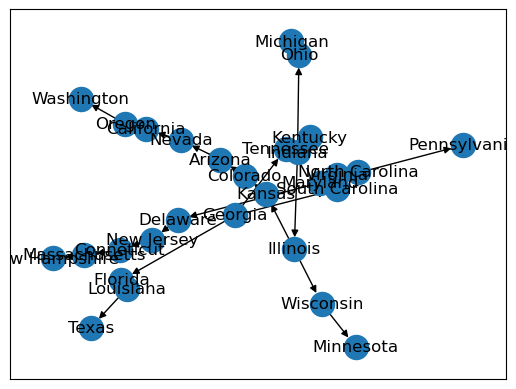

In [1170]:
Directed_Minimal_Huge_Graph2= nx.from_pandas_edgelist(minimal_huge_graph2, 0, 'b', edge_attr='Distance', create_using= nx.DiGraph())
nx.draw_networkx(Directed_Minimal_Huge_Graph2,with_labels=True)
print(Directed_Minimal_Huge_Graph2)

In [1171]:
metrics_graph(graph=Directed_Minimal_Huge_Graph2,weight='Distance',demand='warehouse size',location='Georgia')

Closeness centrality for all nodes:


,State,Closeness_centrality
28,New Hampshire,0.000529
27,Massachusetts,0.000470
25,New Jersey,0.000462
26,Conneticut,0.000433
24,Delaware,0.000423
23,Pennsylvania,0.000383
22,Maryland,0.000322
11,Ohio,0.000301
7,Illinois,0.000286
12,Michigan,0.000282


Shortest path to production center:


,State,Shortest_path_to_production_facility
28,Washington,4129
27,Oregon,3969
26,California,3433
25,Nevada,3303
24,Arizona,2563
23,Colorado,1744
22,Minnesota,1346
21,New Hampshire,1293
20,Massachusetts,1225
19,Kansas,1204


Average shortest path to production center:


1330.2857142857142

Betweenness centrality for all nodes:


,State,Betweenness_centrality
7,Illinois,0.047619
10,Indiana,0.047619
5,Colorado,0.039683
6,Kansas,0.039683
4,Arizona,0.037037
13,Kentucky,0.034392
3,Nevada,0.031746
22,Maryland,0.031746
21,Virginia,0.027778
24,Delaware,0.026455


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
15,Georgia,1068.469392
7,Illinois,461.923115
5,Colorado,417.690000
4,Arizona,393.757700
2,California,343.703568
10,Indiana,281.883063
6,Kansas,281.448000
16,Florida,244.260500
17,Louisiana,221.983200
11,Ohio,131.711700


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
28,Washington,4129,2280000,9414120000
27,Oregon,3969,855000,3393495000
26,California,3433,14123800,48487005400
25,Nevada,3303,2150000,7101450000
24,Arizona,2563,3210500,8228511500
23,Colorado,1744,1000000,1744000000
22,Minnesota,1346,820000,1103720000
21,New Hampshire,1293,63800,82493400
20,Massachusetts,1225,1000000,1225000000
19,Kansas,1204,2120000,2552480000


Total distance per product=


940.0132446138149

Entropic degree:


,Entropic_Degree
Georgia,1068.469392
Illinois,824.685987
Colorado,819.000000
Arizona,740.000000
Kansas,540.000000
California,536.000000
Indiana,508.355389
Florida,445.000000
Louisiana,432.000000
Ohio,254.000000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
8,Illinois,0.000286,0.047619,461.923115,0.006294
10,Indiana,0.000276,0.047619,281.883063,0.003703
17,Colorado,0.000181,0.039683,417.690000,0.003001
14,Kansas,0.000231,0.039683,281.448000,0.002582
24,Arizona,0.000136,0.037037,393.757700,0.001988
6,Maryland,0.000322,0.031746,121.245012,0.001241
20,California,0.000145,0.023810,343.703568,0.001188
2,New Jersey,0.000462,0.023810,94.068000,0.001034
15,Kentucky,0.000214,0.034392,91.540700,0.000674
4,Delaware,0.000423,0.026455,57.120224,0.000639


# PART 2 CLUSTER CODE

In [1172]:
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000


In [1173]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
locations = pd.read_csv('us-state-capitals.csv')
# Show contents of the dataframe
locations

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629
5,Colorado,Denver,39.739227,-104.984856
6,Connecticut,Hartford<br>,41.764046,-72.682198
7,Delaware,Dover,39.157307,-75.519722
8,Hawaii,Honolulu,21.307442,-157.857376
9,Florida,Tallahassee,30.438118,-84.281296


In [1174]:
locations.rename(columns={"name":"0"},inplace=True)
locations.drop(locations.columns[[1]], axis=1, inplace=True)
locations

,0,latitude,longitude
0,Alabama,32.377716,-86.300568
1,Alaska,58.301598,-134.420212
2,Arizona,33.448143,-112.096962
3,Arkansas,34.746613,-92.288986
4,California,38.576668,-121.493629
5,Colorado,39.739227,-104.984856
6,Connecticut,41.764046,-72.682198
7,Delaware,39.157307,-75.519722
8,Hawaii,21.307442,-157.857376
9,Florida,30.438118,-84.281296


In [1175]:
for i in range(len(locations)):        
    if locations.iloc[i,0] == 'Connecticut':
        locations.iloc[i,0] = 'Conneticut'

In [1176]:
c = list(Mississippi_Graph.nodes)
l2 = []
for i in range(len(locations)):
    if locations.iloc[i,0] not in c:
        l2.append(i)

In [1177]:
locations.drop(locations.index[l2], inplace=True)
a = locations.pop('0')
#locations.drop(locations.columns[[0]], axis=1, inplace=True)
locations

,latitude,longitude
2,33.448143,-112.096962
4,38.576668,-121.493629
5,39.739227,-104.984856
6,41.764046,-72.682198
7,39.157307,-75.519722
9,30.438118,-84.281296
10,33.749027,-84.388229
12,39.798363,-89.654961
13,39.768623,-86.162643
15,39.048191,-95.677956


In [1178]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np


def get_even_clusters(X, cluster_size):
    n_clusters = 3
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    centers = kmeans.cluster_centers_
    centers = centers.reshape(-1, 1, X.shape[-1]).repeat(cluster_size, 1).reshape(-1, X.shape[-1])
    distance_matrix = cdist(X, centers)
    clusters = linear_sum_assignment(distance_matrix)[1]//cluster_size
    centroids = kmeans.cluster_centers_
    print(centroids)
    return clusters

In [1179]:
b  = get_even_clusters(locations, 10)

[[  37.329407    -87.98762186]
 [  40.483703   -117.3794975 ]
 [  39.91882644  -75.00231089]]


In [1180]:
df = pd.DataFrame(b, a)
df.rename(columns={0:"cluster"},inplace=True)
df

,cluster
0,
Arizona,1
California,1
Colorado,1
Conneticut,2
Delaware,2
Florida,0
Georgia,0
Illinois,0
Indiana,0


In [1181]:
cluster1 = df.loc[df['cluster'] == 0]

In [1182]:
list1 = cluster1.index.tolist()

In [1183]:
cluster2 = df.loc[df['cluster'] == 1]

In [1184]:
cluster3 = df.loc[df['cluster'] == 2]

In [1185]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list1 or huge_network2.iloc[i,1] not in list1:
        l2.append(i)

In [1186]:
cluster_network1 = huge_network2.copy()

In [1187]:
cluster_network1.drop(cluster_network1.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


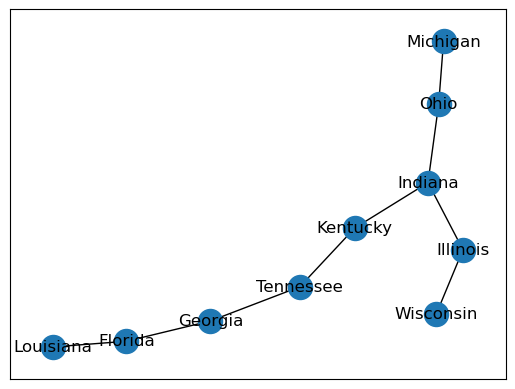

In [1188]:
Cluster1_Graph = nx.from_pandas_edgelist(cluster_network1, 0, 'b', edge_attr='Distance')
Cluster1_Graph = nx.minimum_spanning_tree(Cluster1_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster1_Graph,with_labels=True)
print(Cluster1_Graph)

In [1190]:
metrics_graph(Cluster1_Graph,'Distance','warehouse size','Indiana')

Closeness centrality for all nodes:


,State,Closeness_centrality
4,Kentucky,0.001909
5,Indiana,0.001909
8,Tennessee,0.001754
3,Ohio,0.001549
9,Illinois,0.001500
1,Georgia,0.001471
6,Michigan,0.001160
0,Florida,0.001157
7,Wisconsin,0.001099
2,Louisiana,0.000794


Shortest path to production center:


,State,Shortest_path_to_production_facility
9,Louisiana,1343.2
8,Florida,898.4
7,Georgia,621.4
6,Wisconsin,487.5
5,Michigan,426.1
4,Tennessee,374.8
3,Illinois,214.4
2,Ohio,182.6
1,Kentucky,166.1
0,Indiana,0


Average shortest path to production center:


523.8333333333334

Betweenness centrality for all nodes:


,State,Betweenness_centrality
5,Indiana,0.666667
4,Kentucky,0.555556
8,Tennessee,0.500000
1,Georgia,0.388889
0,Florida,0.222222
3,Ohio,0.222222
9,Illinois,0.222222
2,Louisiana,0.000000
6,Michigan,0.000000
7,Wisconsin,0.000000


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
0,Florida,510.770504
5,Indiana,460.449414
2,Louisiana,444.800000
9,Illinois,354.395529
1,Georgia,349.847488
8,Tennessee,317.610117
3,Ohio,286.484524
4,Kentucky,268.320324
7,Wisconsin,139.554100
6,Michigan,124.185000


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,Louisiana,1343.2,50000000,67160000000.0
8,Florida,898.4,4890000,4393176000.0
7,Georgia,621.4,1385000,860639000.0
6,Wisconsin,487.5,1100000,536250000.0
5,Michigan,426.1,1000000,426100000.0
4,Tennessee,374.8,3680000,1379264000.0
3,Illinois,214.4,6012000,1288972800.0
2,Ohio,182.6,1855000,338723000.0
1,Kentucky,166.1,5145000,854584500.0
0,Indiana,0,5450000,0


Total distance per product=


959.2720704944297

Entropic degree:


,Entropic_Degree
Florida,930.534713
Indiana,830.386680
Georgia,680.835823
Illinois,632.713578
Tennessee,591.673093
Ohio,552.472325
Kentucky,486.572352
Louisiana,444.800000
Wisconsin,273.100000
Michigan,243.500000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
1,Indiana,0.001909,0.666667,460.449414,0.586000
0,Kentucky,0.001909,0.555556,268.320324,0.284569
2,Tennessee,0.001754,0.500000,317.610117,0.278502
5,Georgia,0.001471,0.388889,349.847488,0.200132
7,Florida,0.001157,0.222222,510.770504,0.131298
4,Illinois,0.001500,0.222222,354.395529,0.118114
3,Ohio,0.001549,0.222222,286.484524,0.098616
6,Michigan,0.001160,0.000000,124.185000,0.000000
8,Wisconsin,0.001099,0.000000,139.554100,0.000000
9,Louisiana,0.000794,0.000000,444.800000,0.000000


In [1191]:
list2 = cluster2.index.tolist()


In [1192]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list2 or huge_network2.iloc[i,1] not in list2:
        l2.append(i)

In [1193]:
cluster_network2 = huge_network2.copy()

In [1194]:
cluster_network2.drop(cluster_network2.index[l2], inplace=True)

Graph with 9 nodes and 8 edges


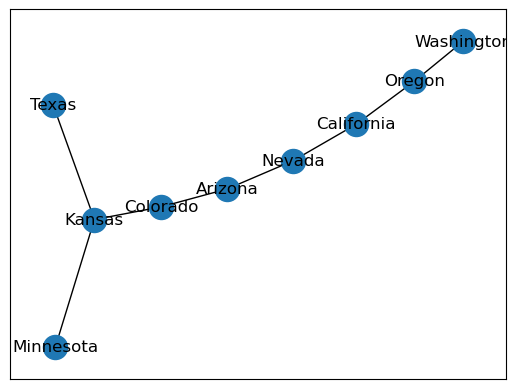

In [1195]:
Cluster2_Graph = nx.from_pandas_edgelist(cluster_network2, 0, 'b', edge_attr='Distance')
Cluster2_Graph = nx.minimum_spanning_tree(Cluster2_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster2_Graph,with_labels=True)
print(Cluster2_Graph)

In [1196]:
metrics_graph(Cluster2_Graph,'Distance','warehouse size','Arizona')

Closeness centrality for all nodes:


,State,Closeness_centrality
4,Arizona,0.000749
2,Nevada,0.000701
3,Colorado,0.000696
5,California,0.000677
8,Kansas,0.000609
7,Oregon,0.000552
0,Washington,0.000513
6,Minnesota,0.000481
1,Texas,0.000446


Shortest path to production center:


,State,Shortest_path_to_production_facility
8,Texas,2051.0
7,Minnesota,1864.8
6,Washington,1564.7
5,Oregon,1406.3
4,Kansas,1363.8
3,California,870.2
2,Colorado,818.6
1,Nevada,739.5
0,Arizona,0


Average shortest path to production center:


1334.8625000000002

Betweenness centrality for all nodes:


,State,Betweenness_centrality
4,Arizona,0.571429
2,Nevada,0.535714
3,Colorado,0.535714
8,Kansas,0.464286
5,California,0.428571
7,Oregon,0.250000
0,Washington,0.000000
1,Texas,0.000000
6,Minnesota,0.000000


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
8,Kansas,1468.377206
4,Arizona,1243.427461
3,Colorado,943.570909
5,California,810.094364
2,Nevada,593.441853
1,Texas,558.511171
7,Oregon,454.148863
6,Minnesota,265.043536
0,Washington,91.985228


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
8,Texas,2051.0,8834000,18118534000.0
7,Minnesota,1864.8,820000,1529136000.0
6,Washington,1564.7,2280000,3567516000.0
5,Oregon,1406.3,855000,1202386500.0
4,Kansas,1363.8,2120000,2891256000.0
3,California,870.2,14123800,12290530760.0
2,Colorado,818.6,1000000,818600000.0
1,Nevada,739.5,2150000,1589925000.0
0,Arizona,0,3210500,0


Total distance per product=


1186.8880341759598

Entropic degree:


,Entropic_Degree
Kansas,2553.474677
Arizona,2026.262470
Colorado,1762.362211
Nevada,1030.079520
Oregon,856.451480
California,810.094364
Texas,687.200000
Minnesota,501.000000
Washington,158.400000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Arizona,0.000749,0.571429,1243.427461,0.532287
4,Kansas,0.000609,0.464286,1468.377206,0.415284
2,Colorado,0.000696,0.535714,943.570909,0.351718
3,California,0.000677,0.428571,810.094364,0.235169
1,Nevada,0.000701,0.535714,593.441853,0.222739
5,Oregon,0.000552,0.250000,454.148863,0.062680
6,Washington,0.000513,0.000000,91.985228,0.000000
7,Minnesota,0.000481,0.000000,265.043536,0.000000
8,Texas,0.000446,0.000000,558.511171,0.000000


In [1197]:
list3 = cluster3.index.tolist()

In [1198]:
l2 = []

for i in range(len(huge_network2)):
    if huge_network2.iloc[i,0] not in list3 or huge_network2.iloc[i,1] not in list3:
        l2.append(i)

In [1199]:
cluster_network3 = huge_network2.copy()

In [1200]:
cluster_network3.drop(cluster_network3.index[l2], inplace=True)

Graph with 10 nodes and 9 edges


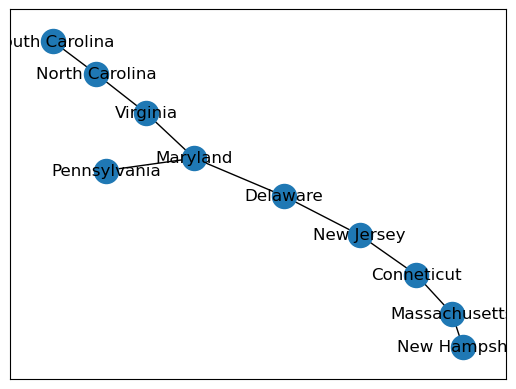

In [1201]:
Cluster3_Graph = nx.from_pandas_edgelist(cluster_network3, 0, 'b', edge_attr='Distance')
Cluster3_Graph = nx.minimum_spanning_tree(Cluster3_Graph, weight='Distance', algorithm='kruskal', ignore_nan=False)

nx.draw_networkx(Cluster3_Graph,with_labels=True)
print(Cluster3_Graph)

In [1202]:
metrics_graph(Cluster3_Graph,'Distance','warehouse size','Maryland')

Closeness centrality for all nodes:


,State,Closeness_centrality
1,Maryland,0.003288
5,Delaware,0.003288
9,New Jersey,0.003037
8,Virginia,0.002721
6,Pennsylvania,0.002499
0,Conneticut,0.002425
2,Massachusetts,0.002083
7,North Carolina,0.002058
4,New Hampshire,0.001848
3,South Carolina,0.001456


Shortest path to production center:


,State,Shortest_path_to_production_facility
9,South Carolina,546.0
8,New Hampshire,537.4
7,Massachusetts,468.8
6,Conneticut,367.3
5,North Carolina,320.1
4,New Jersey,180.2
3,Virginia,142.4
2,Pennsylvania,107.9
1,Delaware,67.5
0,Maryland,0


Average shortest path to production center:


304.17777777777775

Betweenness centrality for all nodes:


,State,Betweenness_centrality
1,Maryland,0.638889
5,Delaware,0.555556
9,New Jersey,0.500000
0,Conneticut,0.388889
8,Virginia,0.388889
2,Massachusetts,0.222222
7,North Carolina,0.222222
3,South Carolina,0.000000
4,New Hampshire,0.000000
6,Pennsylvania,0.000000


Demand adjusted entropic degree for all nodes:


,State,Demand_Adjusted_Entropic_Degree
0,Conneticut,369.880211
1,Maryland,269.479992
7,North Carolina,269.298452
8,Virginia,241.646699
9,New Jersey,223.881053
3,South Carolina,131.663307
5,Delaware,124.191805
2,Massachusetts,117.742584
6,Pennsylvania,85.845276
4,New Hampshire,34.454940


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,South Carolina,546.0,2340000,1277640000.0
8,New Hampshire,537.4,63800,34286120.0
7,Massachusetts,468.8,1000000,468800000.0
6,Conneticut,367.3,14123800,5187671739.999999
5,North Carolina,320.1,397800,127335780.0
4,New Jersey,180.2,2260000,407252000.0
3,Virginia,142.4,2300000,327520000.0
2,Pennsylvania,107.9,8350000,900965000.0
1,Delaware,67.5,1000200,67513500.0
0,Maryland,0,2300000,0


Total distance per product=


257.76562122827784

Entropic degree:


,Entropic_Degree
North Carolina,523.842755
Maryland,463.483666
Virginia,415.612666
New Jersey,385.997291
Conneticut,369.880211
Delaware,231.957183
South Carolina,225.900000
Massachusetts,219.914666
Pennsylvania,107.900000
New Hampshire,68.600000


,State,Closeness_centrality,Betweenness_centrality,Demand_Adjusted_Entropic_Degree,Combined_metric
0,Maryland,0.003288,0.638889,269.479992,0.566010
5,Conneticut,0.002425,0.388889,369.880211,0.348812
2,New Jersey,0.003037,0.500000,223.881053,0.340015
3,Virginia,0.002721,0.388889,241.646699,0.255734
1,Delaware,0.003288,0.555556,124.191805,0.226826
7,North Carolina,0.002058,0.222222,269.298452,0.123153
6,Massachusetts,0.002083,0.222222,117.742584,0.054505
4,Pennsylvania,0.002499,0.000000,85.845276,0.000000
8,New Hampshire,0.001848,0.000000,34.454940,0.000000
9,South Carolina,0.001456,0.000000,131.663307,0.000000


In [1203]:
def metrics_cluster(graph1,graph2,graph3,weight,demand,location1,location2,location3):
    b1 = shortest_path(graph1,location1,weight)
    b2 = shortest_path(graph2,location2,weight)
    b3 = shortest_path(graph3,location3,weight)
    e = average_shortest_path(graph,location,weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    
    print('Shortest path to production center:')
    display(b1)
    display(b2)
    display(b3)
    print('Average shortest path to production center:')
    display(e)
    display(g)
    print("Total distance per product=")
    display(h)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [1204]:
def metrics_graph(graph,weight,demand,location):
    c = closeness_centrality(graph,weight)
    b = shortest_path(graph,location,weight)
    e = average_shortest_path(graph,location,weight)
    d = betweenness_centrality(graph, weight)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    g = shortest_path_product1(graph,location,weight,demand)
    h = shortest_path_product2(graph,location,weight,demand)
    i = entropic_degree(graph, weight)
    
    print('Closeness centrality for all nodes:')
    display(c)
    print('Shortest path to production center:')
    display(b)
    print('Average shortest path to production center:')
    display(e)
    print('Betweenness centrality for all nodes:')
    display(d)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    display(g)
    print("Total distance per product=")
    display(h)
    print('Entropic degree:')
    display(i)
    
    f = pd.merge(pd.merge(c,d,on='State'),a,on='State')
    f['Combined_metric'] = f['Closeness_centrality'] * f['Betweenness_centrality'] * f['Demand_Adjusted_Entropic_Degree']
    f.sort_values(by=['Combined_metric'], ascending=False, inplace=True)
    display(f)
    
    import warnings
    warnings.filterwarnings("ignore")

In [1205]:
def metrics_cluster(graph1,graph2,graph3,weight,demand,location1,location2,location3):
    global b4
    b1 = shortest_path(graph1,location1,weight)
    b2 = shortest_path(graph2,location2,weight)
    b3 = shortest_path(graph3,location3,weight)
    b4 = pd.concat([b1, b2, b3])
    average_shortest_path = b4['Shortest_path_to_production_facility'].sum() / len(b4) - 3
    display(b4)
    print("Average shortest path:", average_shortest_path)
    
    g1 = shortest_path_product1(graph1,location1,weight,demand)
    g2 = shortest_path_product1(graph2,location2,weight,demand)
    g3 = shortest_path_product1(graph3,location3,weight,demand)
    g4 = pd.concat([g1, g2, g3])
    average_shortest_product_path = g4['Total_distance'].sum()/g4['Warehouse_size'].sum()
    display(g4)
    print('Average shortest path per product:', average_shortest_product_path)

# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE LOUISIANA

In [1206]:
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["California"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 2300000


metrics_cluster(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','Louisiana','Arizona','Maryland')

,State,Shortest_path_to_production_facility
9,Wisconsin,1830.7
8,Michigan,1769.3
7,Illinois,1557.6
6,Ohio,1525.8
5,Indiana,1343.2
4,Kentucky,1177.1
3,Tennessee,968.4
2,Georgia,721.8
1,Florida,444.8
0,Louisiana,0


Average shortest path: 850.6275862068965


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,Wisconsin,1830.7,1100000,2013770000.0
8,Michigan,1769.3,1000000,1769300000.0
7,Illinois,1557.6,6012000,9364291200.0
6,Ohio,1525.8,1855000,2830359000.0
5,Indiana,1343.2,5450000,7320439999.999999
4,Kentucky,1177.1,5145000,6056179500.0
3,Tennessee,968.4,3680000,3563712000.0
2,Georgia,721.8,1385000,999693000.0
1,Florida,444.8,4890000,2175072000.0
0,Louisiana,0,50000000,0


Average shortest path per product: 486.91800109166593


# PART 2 CLUSTER NETWORK WITH PRODUCTION NODE KENTUCKY

In [1207]:
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 50000000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 5450000
metrics_cluster(Cluster1_Graph,Cluster2_Graph,Cluster3_Graph,'Distance','warehouse size','Indiana','Arizona','Maryland')

,State,Shortest_path_to_production_facility
9,Louisiana,1343.2
8,Florida,898.4
7,Georgia,621.4
6,Wisconsin,487.5
5,Michigan,426.1
4,Tennessee,374.8
3,Illinois,214.4
2,Ohio,182.6
1,Kentucky,166.1
0,Indiana,0


Average shortest path: 622.2068965517242


,State,Shortest_path_to_production_facility,Warehouse_size,Total_distance
9,Louisiana,1343.2,5450000,7320440000.0
8,Florida,898.4,4890000,4393176000.0
7,Georgia,621.4,1385000,860639000.0
6,Wisconsin,487.5,1100000,536250000.0
5,Michigan,426.1,1000000,426100000.0
4,Tennessee,374.8,3680000,1379264000.0
3,Illinois,214.4,6012000,1288972800.0
2,Ohio,182.6,1855000,338723000.0
1,Kentucky,166.1,5145000,854584500.0
0,Indiana,0,50000000,0


Average shortest path per product: 362.32501054677266
